In [ ]:
#my analysis is that there is a positive relationship between mouse weight gain and the tumor size increasing 
#as long as they are treated with capomulin.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [47]:
# Checking the number of mice.
mice_num = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {mice_num}")

Number of mice: 249


In [55]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
print("Duplicate Mouse IDs:")
print(duplicate_mice_ids)

Duplicate Mouse IDs:
['g989']


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]
print("Data for Duplicate Mouse IDs:")
duplicate_data



Data for Duplicate Mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data.drop_duplicates(subset=['Mouse ID'], keep='first')

clean_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [52]:
# Checking the number of mice in the clean DataFrame.

num_mice_clean = clean_data['Mouse ID'].nunique()
print(f"Number of mice in clean DataFrame: {num_mice_clean}")


Number of mice in clean DataFrame: 249


## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame(summary_stats)

# print
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Mean Tumor Volume', 'mean'), 
                                                                             ('Median Tumor Volume', 'median'), 
                                                                             ('Tumor Volume Variance', 'var'), 
                                                                             ('Tumor Volume Std. Dev.', 'std'), 
                                                                             ('Tumor Volume Std. Err.', 'sem')])

# print
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

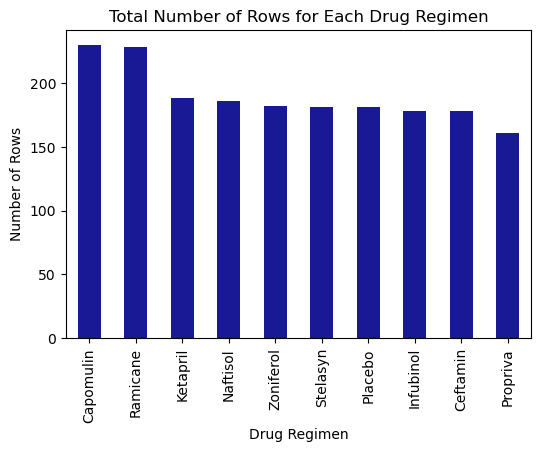

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
drug_counts = combined_data['Drug Regimen'].value_counts()

# Plot the bar plot using Pandas
ax = drug_counts.plot(kind='bar', color='darkblue', alpha=0.9, figsize=(6, 4))

# Set the title and labels
ax.set_title('Total Number of Rows for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Rows')

# Show the plot
plt.show()



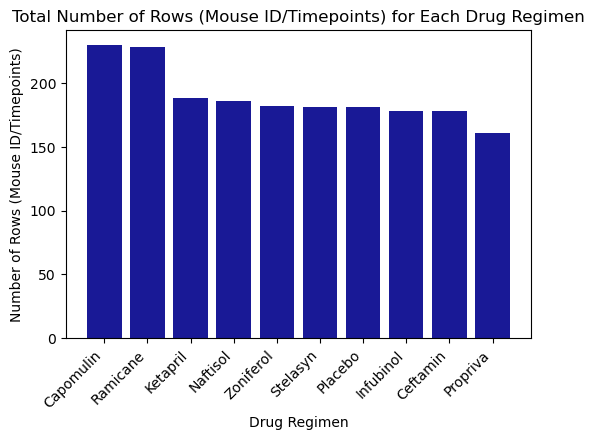

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.



drug_counts = combined_data['Drug Regimen'].value_counts()


drug_regimens = drug_counts.index
row_counts = drug_counts.values


plt.figure(figsize=(6, 4))
plt.bar(drug_regimens, row_counts, color='Darkblue', alpha=0.9)

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45, ha='right')

plt.show()


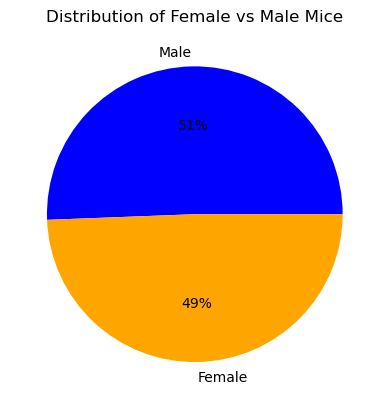

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = combined_data['Sex'].value_counts()

ax = sex_distribution.plot(kind='pie', autopct='%1.0f%%', colors=['blue', 'orange'], startangle=360)
ax.set_title('Distribution of Female vs Male Mice')
ax.set_aspect('equal')
ax.set_ylabel('')

plt.show()


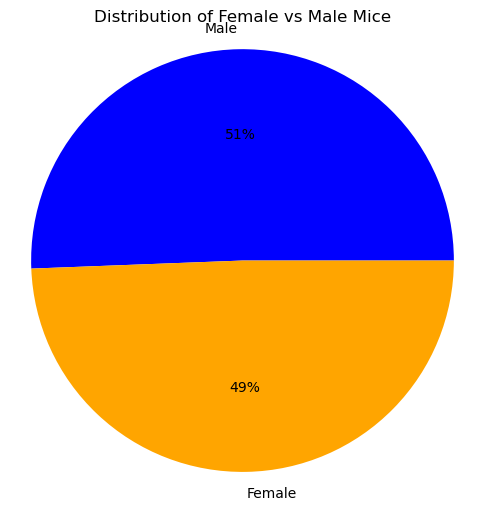

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_distribution = combined_data['Sex'].value_counts()
labels = sex_distribution.index
colors = ['blue', 'orange']

plt.figure(figsize=(6, 6))
plt.pie(sex_distribution, labels=labels, colors=colors, autopct='%1.0f%%', startangle=360)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'], how='inner')

specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(specified_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    tumor_vol = treatment_df['Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print("-----------------------------")
    print(f"Results for {treatment}:")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of potential outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Potential Outliers:")
        print(outliers)
    print("-----------------------------\n")


-----------------------------
Results for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range (IQR): 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Number of potential outliers: 0
-----------------------------

-----------------------------
Results for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Interquartile Range (IQR): 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Number of potential outliers: 0
-----------------------------

-----------------------------
Results for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Interquartile Range (IQR): 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Number of potential outliers: 1
Potential Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------

-----------------------------
Results for Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64

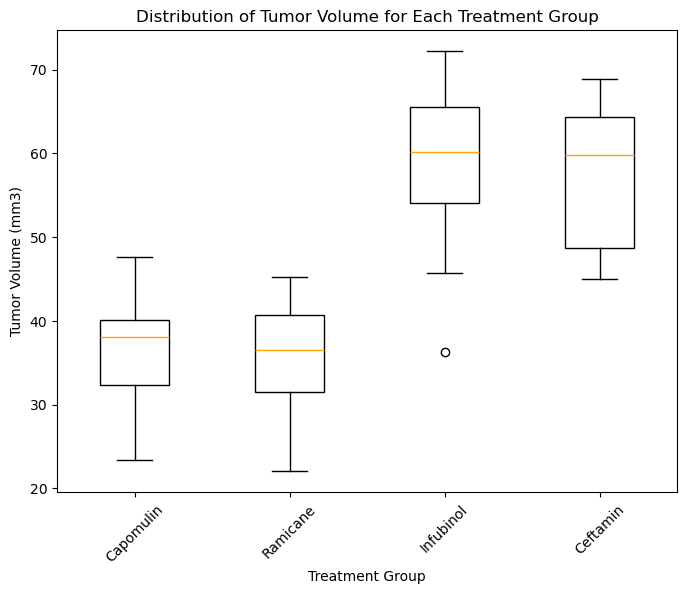

In [112]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, medianprops=dict(color='orange'), boxprops=dict(facecolor='white'))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

plt.xticks(rotation=45)
plt.show()


## Line and Scatter Plots

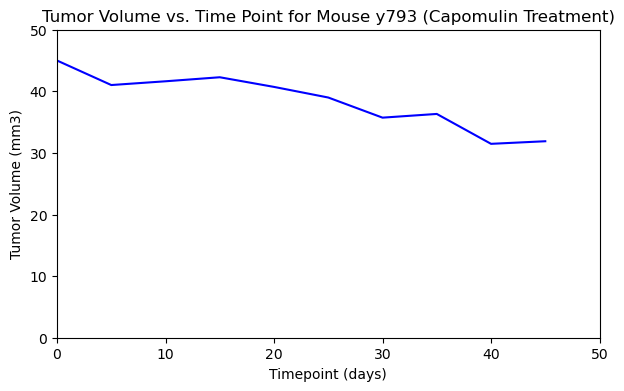

In [134]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

mouse_id = 'y793'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(7, 4))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0, 50)
plt.ylim(0, 50)

plt.show()





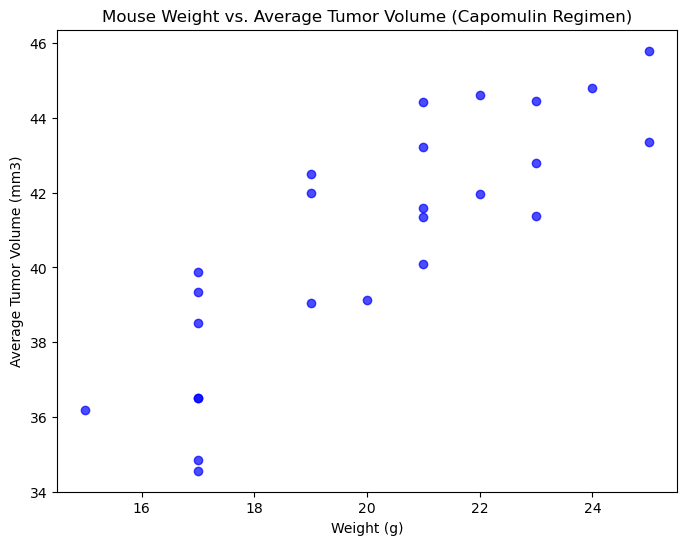

In [135]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

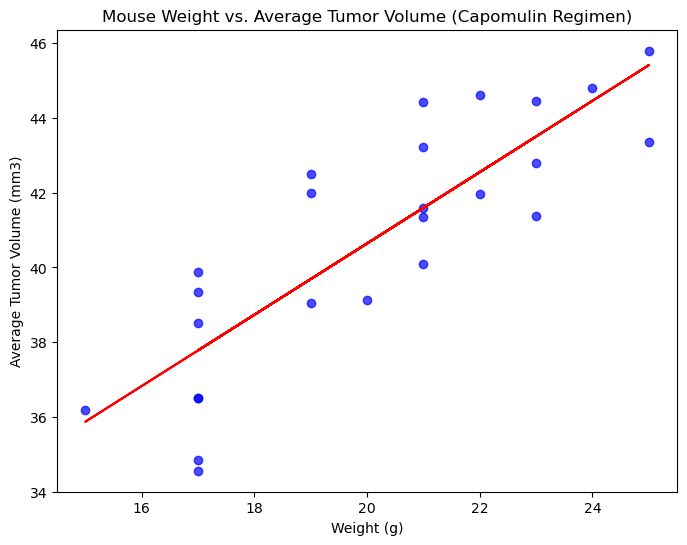

In [138]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')
correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
slope, intercept, _, _, _ = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')

plt.show()


In [ ]:
#I relied on chatgpt and in class activities to be able to succesfully finish the homework